In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Hours and Scores.csv")
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values

In [3]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
print(f"Weight (slope): {model.coef_[0]:.4f}")
print(f"Bias (intercept): {model.intercept_:.4f}")

Weight (slope): 9.6821
Bias (intercept): 2.8269


In [6]:
# Predict on test set
y_pred = model.predict(X_test)

In [7]:
# Show predicted scores
print("\nPredicted scores vs Actual scores:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.1f} --> Predicted: {pred:.1f}")


Predicted scores vs Actual scores:
Actual: 81.0 --> Predicted: 83.2
Actual: 30.0 --> Predicted: 27.0
Actual: 21.0 --> Predicted: 27.0
Actual: 76.0 --> Predicted: 69.6
Actual: 62.0 --> Predicted: 60.0


##  How to tell if the model is “good”
Use R² Score (you already have it):

R² = 1 means perfect prediction.

R² > 0.9 is excellent, > 0.8 is good for real-world data.

Check MSE / MAE:

Smaller = better.

Mean Squared Error = average of squared differences (you already calculated this too).

Visual Check:

Plot actual vs predicted points on a scatter plot.

If they’re close to a straight line (y = x), your model is doing well.

In [8]:
# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")

R² Score: 0.9678
Mean Squared Error: 18.9432


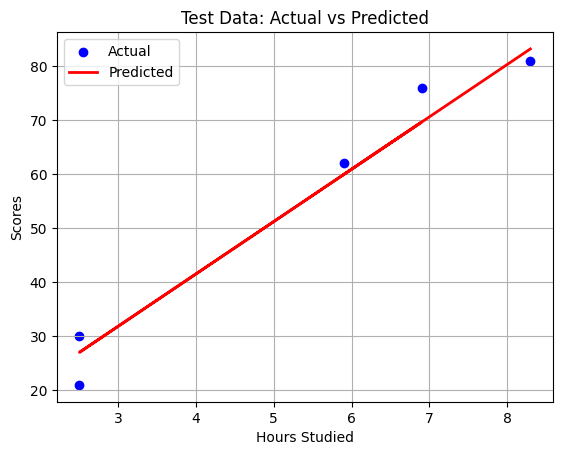

In [9]:
# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Test Data: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()